# K-means clustring

### Importing libraries

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

pd.set_option('display.max_columns', None)

### Working with Dataset

In [2]:
df = pd.read_csv("./data/Mall_Customers.csv")
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
df.shape

(200, 5)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [16]:
# X = df.drop(columns=["CustomerID", "Gender", "Age"], axis=1).values
X = df.iloc[:, [3, 4]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

### Visualize the data points

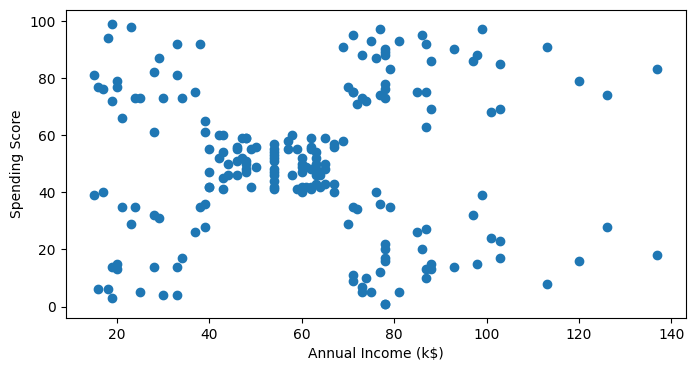

In [32]:
plt.figure(figsize=(8, 4))
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score")
plt.show()


### find the K value using the Elbow method

In [33]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=2)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

[269981.28,
 184609.9843409062,
 132485.3805668016,
 73679.78903948834,
 44448.45544793371,
 38858.9599751439,
 32277.08965740142,
 25095.703209997548,
 22910.22312341746,
 20605.028249194413]

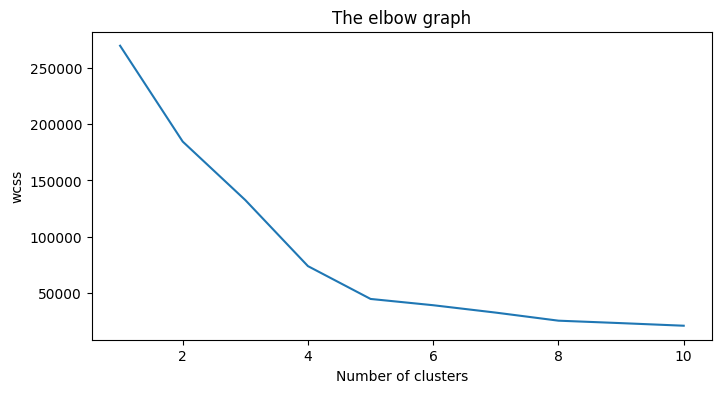

In [37]:
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), wcss)
plt.title("The elbow graph")
plt.xlabel("Number of clusters")
plt.ylabel("wcss")
plt.show()

 ##### WCSS doesn't reduce much after k=5. So, we can choose k=5 as the perfect k value for clusters

### Training the k-means algorithm